# Problem Description

You have information on creatures from the wildly popular game "Tappymon Stop" in the following form:

| Creature    | Type  | Attack Name | Attack Damage | Attack Duration (s) |
|-------------|-------|-------------|---------------|---------------------|
| Slowtap     | Water | Sploosh     |             5 |                   2 |
| Seatras     | Water | Spray       |             8 |                 1.1 |
| Slowsis     | Water | Sploosh     |            10 |                   2 |
| Ceevee      | Earth | Pwoosh      |            15 |                 5.5 |
| Fireworkeon | Fire  | Fwoosh      |            35 |                   6 |

Assume that the only types of Tappymon Stop creatures are Water, Fire, and Earth. However, there are many creature and attack names, and more are frequently added.

This information is available in `csv` format in the file `tappy.csv`.

## Planning

### Step 1a: Identify the information in the file your program will read

The files contain information on creatures in the game Tappymon stop, each with its name, its type (one of Water, Fire, and Earth), its attack name, damage (in points per attack), and duration (in seconds for the attack). Damage is always an integer, but attack duration may not be.

### Step 1b: Write a description of what your program will produce

Here are a few things we might do with this data:

5. Find all the creatures with a given attack name.
6. Chart the "damage per second" (attack damage divided by attack duration) vs. damage
7. Create a scatterplot of duration vs. damage.

We'll focus on the second of these, but we'll represent *all* the information in the file for future use in other analyses.

**We will make the assumption that (as in the example above) the information is provided in sorted order by attack damage.**

### Step 1c: Write or draw examples of what your program will produce

We'll use the small example above to show what we might produce.

Plotting this data, it might look a bit like the following:

          |                                                
        9 |                                                   
          |      *                                           
        6 |     / \                         *
          |    |   *----\ /----------------/                        
        3 |    |         *                    
          |   *                              
          +------------------------------------------------
              5   10   15   20   25   30   35   40

## Building the Program

### Step 2a: Design data definitions



In [1]:
from cs103 import *
from typing import NamedTuple, List
from enum import Enum
import csv

##################
# Data Definitions

CreatureType = Enum('CreatureType', ['Fire', 'Earth', 'Water'])
# interp. the category of a creature
# examples are redundant for enumerations

# template based on one of (3 cases) and atomic distinct (3x)
@typecheck
def fn_for_creature_type(ct: CreatureType) -> ...:
    if ct == CreatureType.Fire:
        return ...
    elif ct == CreatureType.Earth:
        return ...
    elif ct == CreatureType.Water:
        return ...
    
    

Creature = NamedTuple('Creature', [('name', str),
                                   ('ctype', CreatureType),
                                   ('attack', str),
                                   ('dmg', int),
                                   ('duration', float)])
# interp. information about a Tappymon Stop creature, with the name of
# the creature, its type, its attack name, damage, and duration (in seconds).
#
# We assume duration is greater than 0.
C_SLOWTAP = Creature('Slowtap', CreatureType.Water, 'Sploosh', 5, 2)
C_SEATRAS = Creature('Seatras', CreatureType.Water, 'Spray', 8, 1.1)
C_SLOWSIS = Creature('Slowsis', CreatureType.Water, 'Sploosh', 10, 2)
C_CEEVEE = Creature('Ceevee', CreatureType.Earth, 'Pwoosh', 15, 5.5)
C_FIREWORKEON = Creature('Fireworkeon', CreatureType.Fire, 'Fwoosh', 35, 6)

# template based on compound (5 fields) and reference rule (once)
@typecheck
def fn_for_creature(c: Creature) -> ...:
    return ...(c.name,
               fn_for_creature_type(c.ctype),
               c.attack,
               c.dmg,
               c.duration)

# List[Creature]
# interp. a list of Tappymon Stop creature data
LOC0 = []
LOC1 = [C_SLOWTAP, C_SLOWSIS, C_CEEVEE]
LOC2 = [C_SLOWTAP, C_SEATRAS, C_SLOWSIS, C_CEEVEE, C_FIREWORKEON]

# template based on arbitrary-sized and reference rule
@typecheck
def fn_for_loc(loc: List[Creature]) -> ...:
    # description of the acc
    acc = ...      # type: ...
    for c in loc:
        acc = ...(fn_for_creature(c), acc)
    
    return ...(acc)

### Step 2b: Design a function to read the information and store it as data in your program

In [2]:
@typecheck
def read(filename: str) -> List[Creature]:
    """    
    reads information from the specified file and returns a list of creatures
    """
    # return []  #stub
    # Template from HtDAP
    # loc contains the result so far
    loc = [] # type: List[Creature]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        
        # skip header line
        next(reader) 

        for row in reader:
            c = Creature(row[0],                         # name
                         parse_creature_type(row[1]),    # type
                         row[2],                         # attack name
                         parse_int(row[3]),              # damage
                         parse_float(row[4]))            # duration
            loc.append(c)
    
    return loc

@typecheck
def parse_creature_type(input: str) -> CreatureType:
    """
    convert input (which must be one of "Fire", "Earth", or "Water") into
    the corresponding CreatureType.
    """
    #return CreatureType.Fire  #stub
    #template from atomic non-distinct (with guidance from CreatureType)
    if input == "Fire":
        return CreatureType.Fire
    elif input == "Earth":
        return CreatureType.Earth
    elif input == "Water":
        return CreatureType.Water

start_testing()

expect(read("empty_tappy.csv"), [])
expect(read("short_tappy.csv"), LOC1)
expect(read("tappy.csv"), LOC2)

expect(parse_creature_type("Fire"), CreatureType.Fire)
expect(parse_creature_type("Earth"), CreatureType.Earth)
expect(parse_creature_type("Water"), CreatureType.Water)

summary()


6 of 6 tests passed


### Step 2c: Design functions to analyze the data

Our main analysis function will plot the damage per second (DPS) versus damage. To do that, we need to extract the damages and the DPS's. To do the latter, we need to find the DPS of a Tappymon Creature.


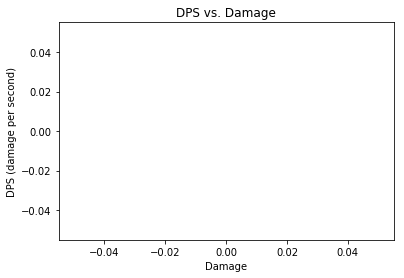

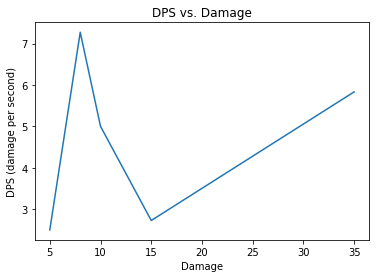

8 of 8 tests passed


In [3]:
import matplotlib.pyplot as pyplot

@typecheck
def plot_dps_vs_dmg(creature_data: List[Creature]) -> None:
    """
    Plots the damage per second (DPS) vs. damage of each creature. 
    Assumes creature_data is sorted by damage.
    
    Draws the plot and returns None.
    """
    #return None  #stub
    # Template based on visualization
    # We divided off two distinct subtasks into helper functions: 
    # + getting the damage of each creature
    # + getting the damage-per-second of each creature
    
    pyplot.title('DPS vs. Damage')
    pyplot.ylabel('DPS (damage per second)')
    pyplot.xlabel('Damage')
    pyplot.plot(get_dmg_list(creature_data), get_dps_list(creature_data))
    pyplot.show()
    

@typecheck
def get_dmg_list(loc: List[Creature]) -> List[int]:
    """
    produce the damage of each Creature in the list
    """
    #return []  #stub
    #template from List[Creature]
    
    # dmgs is a list of the damages seen so far
    dmgs = []   # type: List[int]
    for c in loc:
        dmgs.append(c.dmg)
    
    return dmgs

@typecheck
def get_dps_list(loc: List[Creature]) -> List[float]:
    """
    produce the DPS (damage per second) of each Creature in the list
    """
    #return []  #stub
    #template from List[Creature]
    
    # dps_list is a list of the dps's seen so far
    dps_list = []   # type: List[float]
    for c in loc:
        dps_list.append(calc_dps(c))
    
    return dps_list

@typecheck
def calc_dps(c: Creature) -> float:
    """
    find the DPS (damage per second) of a creature
    """
    #return 1  #stub
    #template from Creature
    return c.dmg / c.duration

start_testing()

# Should produce an empty plot with x-axis "Damage", 
# y-axis "DPS (damage per second)", and title "DPS vs. Damage".
expect(plot_dps_vs_dmg([]), None)


# See the sketched plot in step 1c above for roughly what this should look like.
expect(plot_dps_vs_dmg(LOC2), None)

expect(get_dmg_list([]), [])
expect(get_dmg_list(LOC1), [5, 10, 15])

expect(get_dps_list([]), [])
expect(get_dps_list(LOC1), [2.5, 5, 15/5.5])

expect(calc_dps(C_SLOWTAP), 2.5)
expect(calc_dps(C_CEEVEE), 15/5.5)

summary()

Note that we're not asking you for the `main` function, though it may be good practice to design it anyway!

Briefly, the `main` function would use composition to link together the `read` function with the `plot_dps_vs_dmg` function. For testing, you can use two of the sample files already consturcted for `read`.